# Probostat Data Processing Notebook
This notebook provides a concise and user-friendly interface to work with Probostat data files. Follow the steps to load, view, manipulate, and export your data.

## Table of contents:
**0. Installing external packages missing on the system**  
**1. Load Probostat files into `brlopack` object**  
**2. View data structure and content**   
L___**2.5 Utilize the `DataFrame`**  
**3. Split the Probostat data**  
**4. Manipulate the data**   
L___**4.5 Unit conversions!**  
**5. Exporting**  
**6. Plotting**  
**7. Conclusion**  


---
<div style="page-break-after: always"></div>

# Step 0: Installing external packages missing on the system
We need to set up some things before running the rest of the notebook

In [1]:
import sys
import os
import subprocess

if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    subprocess.run(['git', 'clone', 'https://github.com/lcubrilo/Brillo'])
    os.chdir('Brillo/')
else:
    from NotebookEnvironmentSetup import main
    main()


Assuming local environment...
We already had all necessary packages.


---
<div style="page-break-after: always"></div>

# Step 1: Load Probostat Files into `brlopack` object
First we will import the package I have made for data processing, called `brlopack`.

In [2]:
import brlopack

**Note**: If you ever run into some sort of an issue, not being sure what is `brlopack`, what is `Brillo`, refer to [this notebook](tutorials/1.%20What%20is%20brlopack%20and%20Brillo.ipynb).

### Initialize the BrloPack object
We need to make a `brlopack` object. We can name it whatever we want. Let's say we name it `probostat_session`.  

After that we will load some files into that object. Then we can do whichever operations/functions/methods we want over the loaded data.

In [3]:
probostat_session = brlopack.brlopack()

Now let's load the **Probostat** data files into `probostat_session`.  
Please make sure the files were exported from Origin in the `.csv` format :)  

You can find more details below (optinal):
<details><summary>Click here</summary>

Note 1: you may also choose to load files that were exported from `brlopack` (`.xslx` format)  
Note 2: `brlopack` can also work on **aixACCT** `.dat` files.

There's more than one way to select which files will be loaded:
1. Passing a list of filepaths to `.tellFiles()` method
2. Selecting the files through a **popup window** using `browseDirectories()` method
3. ~~Manually assigning it to the `.wantedFiles` variable~~ (preferrably avoid this)

You should use only one of these approaches, not more (comment out the other two you are not using with a '#' in the beginning of the line)
</details>

In [4]:
# Approach 1 - List of Probostat files to load
# you can use "relative" or "absolute" paths
probostat_files1 = [
    'data/probostat/new/BCTZ_16cikel za lukata loceno-2 point resistances.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Flow.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Keysiht MC.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Temp.csv'
]
probostat_files2 = [
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-2 point R [Ohm).csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-4 point R [Ohm].csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Flow N2.csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC (1).csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC.csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Seebeck.csv'
]
probostat_session.tellFiles(probostat_files1)

############################
# Approach 2 - window popup
#paket.browseDirectories()

############################
# Approach 3 - direct assignment NOT RECOMMENDED
#paket.wantedFiles = ['some files']

Let's see if it worked!

In [5]:
probostat_session.tellMeFiles()

['data/probostat/new/BCTZ_16cikel za lukata loceno-2 point resistances.csv',
 'data/probostat/new/BCTZ_16cikel za lukata loceno-Flow.csv',
 'data/probostat/new/BCTZ_16cikel za lukata loceno-Keysiht MC.csv',
 'data/probostat/new/BCTZ_16cikel za lukata loceno-Temp.csv']

Now we know which files `probostat_session` will try to load!   
Let's do that immediately.  

### Load the files into the `brlopack` object "`probostat_session`"
**Note**: Loading Probostat's files can take up to 1 or 2 minutes, because it is running a costly stitching operation over these `.csv` tables.  
Please be patient!

In [6]:
probostat_session.loadFiles()

**Note**: You should call `.loadFiles()` right after choosing your files (i.e. do not perform other operations inbetween the two).

---
<div style="page-break-after: always"></div> 

# Step 2: View Data Structure and Content
You can explore the files, tables, and columns within the loaded data.


In [7]:
# Example: View the files loaded
loadedFiles = probostat_session.tellMeFiles()
loadedFiles

['Probostat']

### Some questions
If not interested, feel free to skip

**Question 1: Why does `tellMeFiles()` now give us one file** (named 'Probostat') **; when we loaded 4?**  
*Answer 1*
<details><summary>Click here</summary>

In the case of Probostat it is assumed that multiple loaded `.csv` files should be merged/stitched into a single `DataFrame`/table and it will show up as only one file (for now the default name is just `Probostat`).  

*Why?* Usually with Probostat multiple of those files refer to a single experiment/measurement period.
</details>

---

**Question 2: Ok, that's why it is only one file. But what if I want multiple Probostat files to stay separate files?**  
*Answer 2*
<details><summary>Click here</summary>

Shortly - `.csv` files WILL always be merged, `.xlsx` files WILL NOT be merged.  
So if you want to keep some Probostat files separate, import is as an `.xlsx` file.  
The `.xslx` files can be obtained by using the method `[brlopack object name here].exportToExcel()`. 

**Specific example of usage**
<details><summary>Click here</summary>

Let's say you've got a file structure like this:
```
experiments/
├── experiment1/
│   ├── measurement1.csv
│   ├── measurement2.csv
│   └── measurement3.csv
│
├── experiment2/
│   ├── measurement1.csv
│   └── measurement2.csv
│
└── experiment3/
    ├── measurement1.csv
    ├── measurement2.csv
    ├── measurement3.csv
    └── measurement4.csv

```

If you import all of them at the same time, that's no good.  

So here's what you do:
```
experiment1_session = brlopack.brlopack()
experiment1_files = [
    'experiments/experiment1/measurement1.csv',
    'experiments/experiment1/measurement2.csv',
    'experiments/experiment1/measurement3.csv',
]
experiment1_session.tellFiles(experiment1_files)
experiment1_session.exportToExcel()
```
This will create a distinct `.xlsx` file for each experiment.  
Let's say you rename them into something pretty, and your file structure now looks like this:

```
experiments/
├── experiment1/
│   └── same files like before...
│
├── experiment2/
│   └── same files like before...
│
├── experiment3/
│   └── same files like before...
│
└── brillo exports/
    ├── experiment1.xlsx
    ├── experiment2.xlsx
    └── experiment3.xlsx

```

Now you may work with them as separate
```
multi_experiment_session = brlopack.brlopack()
all_experiment_files = [
    'experiments/brillo exports/experiment1.xlsx',
    'experiments/brillo exports/experiment2.xlsx',
    'experiments/brillo exports/experiment3.xlsx'
]
multi_experiment_session.tellFiles(all_experiment_files)
# do whatever analysis you want, when you are done:
multi_experiment_session.exportToExcel()
```
When exported, each of the experiments will be a separate sheet in Excel!

</details>
</details>

---

**Question 3 (not important, feel free to skip): Why does it work like this?**  
*Answer 3*
<details><summary>Click here</summary>

Shortly - It made sense to design it like this for the specific constraints that we had at the time.  

Origin had a lot of problems when exporting all of the measured data from multiple sensors into a single `.csv` file. We had to export data of 2-3 sensors at the most per `.csv` file. Sensors did not necessarily all start to measure from the same point in time, nor did they finish at the same point in time, leading to a lot of `NaN` ("Not a number") values in the table and to crashing. That's why we stitch them back here in the `brlopack` Python package (and for the usecase thus far, we could always assume that Probostat's `.csv` files always need to be stitched)

</details>

---

#### Now let us move onto seeing the table within that file!

In [8]:
# Example: View the tables in a specific file
#tableNames = probostat_session.tellMeTablesInFile(loadedFiles[0])
tableNames = probostat_session.tellMeTablesInFile('Probostat')
tableNames

['table']

**Note**: With Probostat's `.csv` files, there will only be one table in the beginning.  
We will change this in the next step!

Let us save this table in a variable and try to peek into its contents!

In [9]:
table = probostat_session.data['Probostat']['table']
table

,time [min],2pt_fwd_resistance [Ohm],2pt_rev_resistance [Ohm],DMM avg R [Ohm],Flow [ml/min],R (+1V) [Ohm],Electrometer avg [Ohm],R (-1V) [Ohm],Furnace temp [C],Furnace cooling [C],Average (TCT+TCC)/2,TCT [C],TCC (B) [C]
3774,0.000000,NaN,NaN,NaN,199.375900,NaN,NaN,NaN,22.701616,0.000000,NaN,NaN,NaN
3775,0.109233,NaN,NaN,NaN,199.286285,NaN,NaN,NaN,22.706209,0.000000,NaN,NaN,NaN
3776,0.168117,NaN,NaN,NaN,199.351608,NaN,NaN,NaN,22.711246,0.000000,NaN,NaN,NaN
3777,0.226217,NaN,NaN,NaN,199.370743,NaN,NaN,NaN,22.702660,0.000000,NaN,NaN,NaN
3778,0.284300,NaN,NaN,NaN,199.338074,NaN,NaN,NaN,22.698860,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,4483.899483,NaN,NaN,NaN,203.542435,8.984726e+10,-7.300090e+10,-2.358491e+11,NaN,110.833641,154.609014,160.906178,148.311851
15894,4484.846967,NaN,NaN,NaN,203.382858,9.433962e+10,-2.189096e+10,-1.381215e+11,NaN,110.252411,153.815628,160.095249,147.536007
15895,4485.796783,NaN,NaN,NaN,203.300644,-7.092199e+10,1.686206e+11,4.081633e+11,NaN,109.652359,153.018553,159.276783,146.760322
15896,4486.746333,NaN,NaN,NaN,NaN,8.928571e+11,2.757801e+11,-3.412969e+11,NaN,109.062599,152.246187,158.472889,146.019485


This is kind of ugly, simply because there's a lot of columns and rows. This would be ok for a smaller table.  
By default it chose to show you only the first and last few rows. Also it had too many columns, so it broke down the output in three parts.  

This output is overwhelming let's consider something else...

#### Let's see all of the columns in this table!

In [10]:
# Example: View the columns in a specific table
#columnNames = paket.tellMeColumnsInTable(loadedFiles[0], tableNames[0])
columnNames = probostat_session.tellMeColumnsInTable('Probostat', 'table')
columnNames

['time [min]',
 '2pt_fwd_resistance [Ohm]',
 '2pt_rev_resistance [Ohm]',
 'DMM avg R [Ohm]',
 'Flow [ml/min]',
 'R (+1V) [Ohm]',
 'Electrometer avg [Ohm]',
 'R (-1V) [Ohm]',
 'Furnace temp  [C]',
 'Furnace cooling  [C]',
 'Average (TCT+TCC)/2',
 'TCT  [C]',
 'TCC (B)  [C]']

#### Knowing the name of columns is vital to doing any changes to your data!
So keep these names in mind further on.  
You may need to copy paste some of them.

<div style="page-break-after: always"></div>

# Step 2.5 utilizing the DataFrame
We should note that the tables in `brlopack` are actually implemented using the popular `Pandas` package.  
Those tables are known as `DataFrame`s, which we can demonstrate by asking Python of the data type, like so:  

In [11]:
type(table)

pandas.core.frame.DataFrame

`DataFrame`s have a lot of powerful methods.  
Let's look at the simple example of `.info()`, offering a nice overview.  
There is also `.plot()` which may require more care (but in less lines of code than what is presented below)

In [12]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15898 entries, 3774 to 15897
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time [min]                15898 non-null  float64
 1   2pt_fwd_resistance [Ohm]  3768 non-null   float64
 2   2pt_rev_resistance [Ohm]  3774 non-null   float64
 3   DMM avg R [Ohm]           3768 non-null   float64
 4   Flow [ml/min]             15896 non-null  float64
 5   R (+1V) [Ohm]             4542 non-null   float64
 6   Electrometer avg [Ohm]    4542 non-null   float64
 7   R (-1V) [Ohm]             4542 non-null   float64
 8   Furnace temp  [C]         15626 non-null  float64
 9   Furnace cooling  [C]      15897 non-null  float64
 10  Average (TCT+TCC)/2       4542 non-null   float64
 11  TCT  [C]                  4542 non-null   float64
 12  TCC (B)  [C]              4542 non-null   float64
dtypes: float64(13)
memory usage: 1.7 MB


In [13]:
"""plotKinds = ['line', 'hist', 'scatter', 'box', 'area', 'kde', 'density', 'hexbin']
newTable = table.dropna()
from matplotlib import pyplot as plt
for kind in plotKinds:
    print(kind)
    try:
        newTable.plot(x='time [min]', kind=kind, subplots=True)
    except:
        try:
            newTable.plot(kind=kind)
        except Exception as e:
            print(e)
            continue
    plt.show()"""

"plotKinds = ['line', 'hist', 'scatter', 'box', 'area', 'kde', 'density', 'hexbin']\nnewTable = table.dropna()\nfrom matplotlib import pyplot as plt\nfor kind in plotKinds:\n    print(kind)\n    try:\n        newTable.plot(x='time [min]', kind=kind, subplots=True)\n    except:\n        try:\n            newTable.plot(kind=kind)\n        except Exception as e:\n            print(e)\n            continue\n    plt.show()"

That's much nicer. There are some other methods such as:
- `.describe()` for a bunch of statistical info
- `.head()` for the first few rows
- `.tail()` for the last few rows  
etc...  

To learn more about the powerful options `Pandas` offers (that we mostly didn't use), Google [**"Pandas documentation"**](https://pandas.pydata.org/docs/) or [**"Pandas code examples"**](https://pandas.pydata.org/docs/user_guide/10min.html).  
Alternatively, consider asking ChatGPT **"How can I do [your idea] over a Pandas DataFrame?**.  

---
Ok, now we can get back to the main analysis.

---
<div style="page-break-after: always"></div> 

# Step 3: Split the Probostat data
For Probostat experiments I saw, we want to separate the data into isothermic and dynamic  
(that is, depending on whether or not temp is stable, or changing).  

Here's how to do it:

We do that using `separateData(columnName)`.
It looks at the data in a specific column and splits the whole table into segments where the data in that column is rising, dropping or staying around the same value. Also separates out if there is no value.  

**Note**: Right now it only works with data that is shaped like ____/`````\\_, because a generalized algorithm created a lot of bugs. If necessary, I can make the generalized one, please let me know.

In [14]:
#probostat_session = debug_session
debug_session = probostat_session.create_copy()

In [15]:
probostat_session.separateData("Average (TCT+TCC)/2")

into loop
iter
no need to pop
next iteration
iter
no need to pop
next iteration
iter
no need to pop
next iteration
iter
no need to pop
next iteration
all good


c:\Users\Milan\Documents\git clones\Brillo\splitting\newSplittingDF.py:150: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  first, second = array[:n//2], array[n//2:]
c:\Users\Milan\Documents\git clones\Brillo\splitting\newSplittingDF.py:150: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  first, second = array[:n//2], array[n//2:]


Now let us observe the effects of this operation!

In [16]:
probostat_session.tellMeFiles()

['Probostat']

The files are not changed, let us see the tables:

In [17]:
probostat_session.tellMeTablesInFile('Probostat')

['flat', 'rise', 'drop', 'nan']

We now have `rise`, `flat`, `drop` and `nan` instead of `table` after applying the separation operation!

---

---
<div style="page-break-after: always"></div>

# Step 4: Manipulate Data
Here you can perform essential data manipulations, such as unit conversion.


Here is a list of all of the operations that you can do (methods defined in the `brlopack` class):
 1. `divideConstant(columnName, newColumnName, constName)`
 2. `multiplyConstant(columnName, newColumnName, constName)`
 3. `subtractConstant(columnName, newColumnName, constName)`
 4. `addConstant(columnName, newColumnName, constName)`
 5. `inverseColumn(columnName, newColumnName, constName=None)`
 6. `squareColumn(columnName, newColumnName, constName=None)`
 7. `sqrtColumn(columnName, newColumnName, constName=None)`
 8. `averageTwoColumns(columnName, newColumnName, secondColumn)`
 9. `changeUnitOfConstant(constantName, unitPrefix)`
 10. `logN(columnName, newColumnName, constName=None)`
 11. `logConstant(columnName, newColumnName, constName)`
 12. `changeUnitOfColumn(columnName, newColumnName)`
 13. [Others can be made](./tutorials/2.%20How%20to%20make%20your%20own%20operations.ipynb) <sub><span style="color:red;">*</span></sub>  

The operations are generally preformed across all files and tables.

In [18]:
try:
    # Just put in any of the operations from above into line 3
    probostat_session.squareColumn(columnName=columnNames[2], newColumnName="Kvadriran otpor [Ohm^2]")

    all_columns = probostat_session.tellMeColumnsInTable('Probostat', 'flat') # could've printed from any other file/table
    last_column = all_columns[-1]
    print("The newest added column is: ", last_column)

except Exception as e:
    if type(e).__name__ == "KeyError":
        print("You probably typed an incorrect name of column.")
    print(f"The following error happened: {type(e).__name__}: {e}")

The newest added column is:  Kvadriran otpor [Ohm^2]


#### Make sure to play around and change the `line 3` in code cell above to use any other operation!

The cell will print out the name of the column you just created!

---

<div style="page-break-after: always"></div>

# Step 4.5 **unit conversions**!  

Let's pay some special attention to the twelfth operation from our list!  

For example, we could change the unit of this column from ohms to mili-ohms:

In [19]:
probostat_session.changeUnitOfColumn("2pt_fwd_resistance [Ohm]", "2pt_fwd_resistance [mOhm]")

You are also able to do all other *decimal and prefix based* unit conversions (so only multiples of 10).  

 1. It uses all SI prefixes **from pico to terra** (read more in [`valueConversion.py`](./valueConversion.py))  
 2. **Works with exponents**. It will correctly convert 1m<sup>2</sup> into 10 000cm<sup>2</sup>. Same with cubed<sup>3</sup>. Up until <sup>9</sup> (no support for 10-dimensional units)
 3. **No support for imperial** (inches, feet, pounds etc)

**Note**: When doing unit conversions, you must use proper SI prefixes and suffixes  
          (so "mega" has to be a capital "M", mili must be a lower case "m").

**Note 2**: ***You must use <span style="color:red;">square brackets</span> for the units, otherwise code will not crash.***

Let us now see the changes to our table after this operation!  
**Note**: you will have to scroll all the way to the right to see the newly added columns.

In [20]:
for table in ['rise', 'flat', 'drop', 'nan']:
    print(probostat_session.tellMeColumnsInTable('Probostat', table))

['time [min]', '2pt_fwd_resistance [Ohm]', '2pt_rev_resistance [Ohm]', 'DMM avg R [Ohm]', 'Flow [ml/min]', 'R (+1V) [Ohm]', 'Electrometer avg [Ohm]', 'R (-1V) [Ohm]', 'Furnace temp  [C]', 'Furnace cooling  [C]', 'Average (TCT+TCC)/2', 'TCT  [C]', 'TCC (B)  [C]', 'Kvadriran otpor [Ohm^2]', '2pt_fwd_resistance [mOhm]']
['time [min]', '2pt_fwd_resistance [Ohm]', '2pt_rev_resistance [Ohm]', 'DMM avg R [Ohm]', 'Flow [ml/min]', 'R (+1V) [Ohm]', 'Electrometer avg [Ohm]', 'R (-1V) [Ohm]', 'Furnace temp  [C]', 'Furnace cooling  [C]', 'Average (TCT+TCC)/2', 'TCT  [C]', 'TCC (B)  [C]', 'Kvadriran otpor [Ohm^2]', '2pt_fwd_resistance [mOhm]']
['time [min]', '2pt_fwd_resistance [Ohm]', '2pt_rev_resistance [Ohm]', 'DMM avg R [Ohm]', 'Flow [ml/min]', 'R (+1V) [Ohm]', 'Electrometer avg [Ohm]', 'R (-1V) [Ohm]', 'Furnace temp  [C]', 'Furnace cooling  [C]', 'Average (TCT+TCC)/2', 'TCT  [C]', 'TCC (B)  [C]', 'Kvadriran otpor [Ohm^2]', '2pt_fwd_resistance [mOhm]']
['time [min]', '2pt_fwd_resistance [Ohm]', 

---
<div style="page-break-after: always"></div> 

# Step 5: Export Processed Data
Finally, you can export the processed data to an Excel file.

In [21]:
# Export the data to an Excel file
probostat_session.exportToExcel()

---
<div style="page-break-after: always"></div>

# Step 6: Plotting
Here we can also select a subset of files, tables and columns for plotting, among other things.  

Read the tooltips/docstrings for `plotData()` to learn what each argument does.

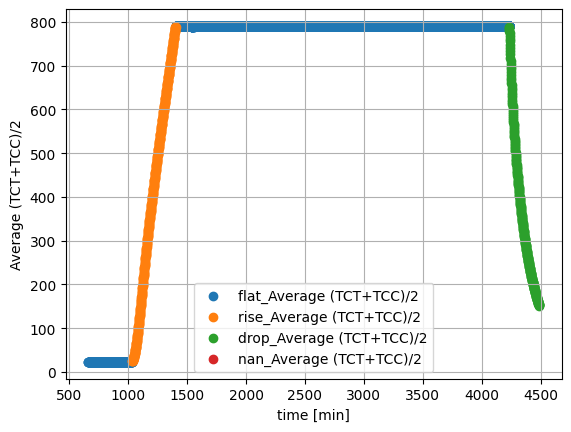

In [22]:
x_axis = columnNames[0]
y_axes = ["Average (TCT+TCC)/2"]
probostat_session.plotData(x_axis, y_axes, None, None, None, None, "Dotted", show=True, showLegend=True, showGrid=True)

This plot is used to prove that splitting has worked properly!  
Of course you may make any other plots.

---

# Conclusion
<div style="font-size:16pt; ">

 - You have successfully:
<div style="font-size:13pt; ">

 1. loaded  
 2. viewed  
 3. manipulated  
 4. exported + visualized  
</div>
  your Probostat data.  
  
 - Feel free to **modify the code cells** to work with your specific data and requirements!  
 - You may also **contact me** with *any questions* you might have over email or WhatsApp (ask around the office).
</div>